In [1]:
#Import Relevant Modules
import re
from datetime import datetime, date
from time import sleep
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output

In [2]:
#Retrive today's date
date = date.today()

In [3]:
def getHVData(filename):
    '''
    Extract pressure data from txt file

    @param:
        filename -> str
    
    @return:
        4D list of time, set voltage, read voltage, and current -> list
    '''
    
    data = []                          
    pressure_pattern = re.compile(r'\[\d{4}-\d{2}-\d{2} (.*?)\] Set: \d* V,  HV: \d* V,  I: ([\d\.]*) mA', re.I)
    
    with open(filename, "r") as f:
        for line in f:
            p = pressure_pattern.search(line)
            if p:
                log_time = p.group(1)
                current = p.group(2)
                # log_time = datetime.strptime(time_str, "%H:%M:%S").time()

                data.append((log_time, current))
    return data

In [4]:
def createCurrentCSV(hv_data):
    '''

    @param:
    pressure_data: list of data -> list
    '''
    with open(f'HV_Current_log-{str(date)}.csv', 'w', newline='') as out:
        writer = csv.writer(out)
        writer.writerow(['Time', 'Current (mA)'])   # header
        writer.writerows(hv_data)

    print(f'{len(hv_data)} rows written to HV_Current_log-{str(date)}.csv')

In [5]:
def getHVGraph(csv_file, start_time='00:00:01', end_time='23:59:59', time_list = []):
    '''
    Displays Pressure Graph

    @param:
        csv_file : File Name -> str
        start_time : -> str
        end_time : -> str
    
    '''
    result = pd.read_csv(csv_file)

    # data = result.to_numpy()

    #Check if time exists to provide warning
    if (result.loc[result['Time'] == start_time]).empty:
        print("Start Time does not exist, using default start time")

    if (result.loc[result['Time'] == end_time]).empty:
        print("End Time does not exist, using default end time")

    # Filter by time range
    filtered = result[(result['Time'] >= start_time) & (result['Time'] <= end_time)]
    # average = filtered.iloc[:,1].to_numpy().mean()

    
    highlight = result[result['Time'].isin(time_list)]
    print(highlight) 
    

    fig = plt.figure(figsize=(12,10))
    gs = fig.add_gridspec(4,1)

    ax1 = fig.add_subplot(gs[:3,0])
    ax1.plot(filtered['Time'].to_numpy(), filtered['Current (mA)'].to_numpy())
    ax1.scatter(highlight['Time'], highlight['Current (mA)'],  color='red', label='Current')
    ax1.grid()
    ax1.set_title('Beam Current x Time')
    ax1.set_xlabel("Time Elapsed (s)")
    ax1.set_ylabel("Current (mA)")

    plt.show()

2836 rows written to HV_Current_log-2025-06-10.csv
Start Time does not exist, using default start time
End Time does not exist, using default end time
Empty DataFrame
Columns: [Time, Current (mA)]
Index: []


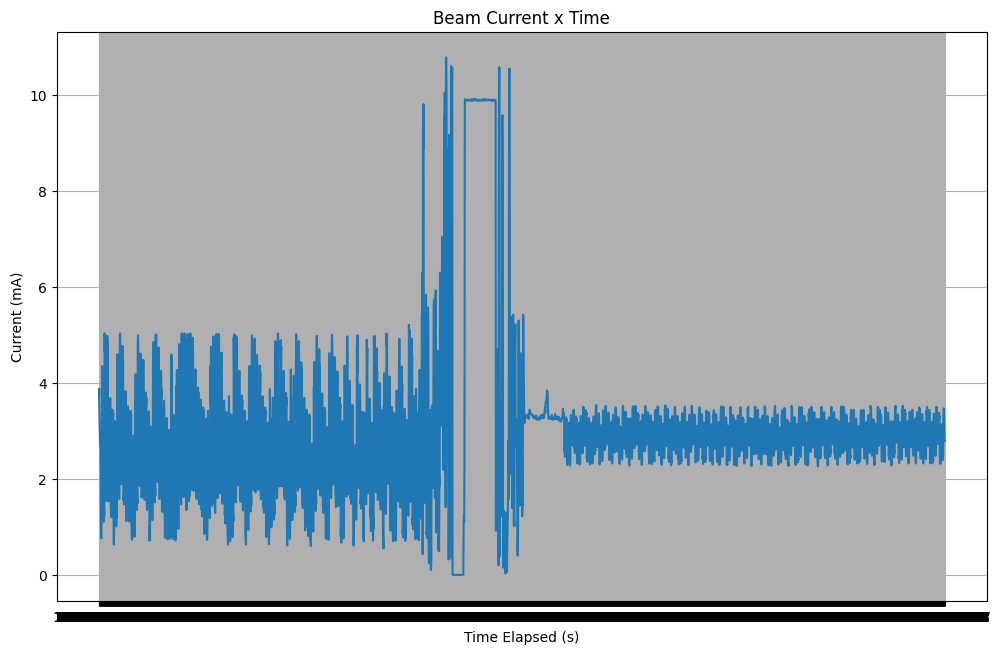

In [6]:
createCurrentCSV(getHVData('HV_monitor 2025-06-10.txt'))
getHVGraph(f'HV_Current_log-{date}.csv')

In [9]:
while 1 :
    createCurrentCSV(getHVData('HV_monitor 2025-06-10.txt'))
    sleep(10)
    clear_output(wait=False)
    getHVGraph(f'HV_Current_log-{date}.csv')

Start Time does not exist, using default start time
End Time does not exist, using default end time
Empty DataFrame
Columns: [Time, Current (mA)]
Index: []


KeyboardInterrupt: 